# 折线图绘制

### 数据读取 

In [3]:
import pandas as pd
import os

filepath="C:\\Users\\ma\\Desktop\\唐宇迪-机器学习课程\\Python库代码（4个）\\3-可视化库matpltlib\\UNRATE.csv"
pwd=os.getcwd()
os.chdir(os.path.dirname(filepath))
df = pd.read_csv(os.path.basename(filepath))
os.chdir(pwd)
print(df.head(3))

       DATE  VALUE
0  1948/1/1    3.4
1  1948/2/1    3.8
2  1948/3/1    4.0


### 时间格式转换用pd.to_datetime 

In [4]:
df["DATE"]=pd.to_datetime(df["DATE"])
print(df.head(3))

        DATE  VALUE
0 1948-01-01    3.4
1 1948-02-01    3.8
2 1948-03-01    4.0


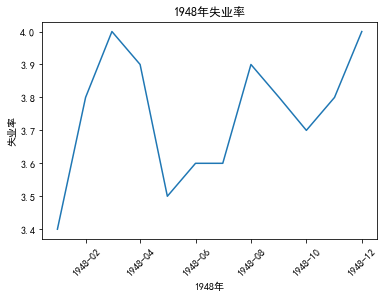

In [14]:
import matplotlib.pyplot as plt
%matplotlib inline
df12=df[0:12]
plt.plot(df12["DATE"],df12["VALUE"])
plt.xticks(rotation=45)
plt.xlabel("1948年")
plt.ylabel("失业率")
plt.title("1948年失业率")
plt.rcParams["font.sans-serif"]=["SimHei"]
plt.rcParams["axes.unicode_minus"]=False
plt.show()

# 子图操作 

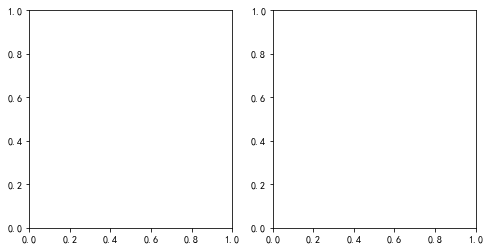

In [20]:
fig=plt.figure(figsize=(8,4))
ax1=fig.add_subplot(1,2,1)
ax2=fig.add_subplot(1,2,2)
#对子图操作用ax1.plot()
plt.show()

### 在一张图中画多条曲线，需要多写几次plt.plot(x参数,y参数，c="red",label=...),指定不同颜色、标签即可 

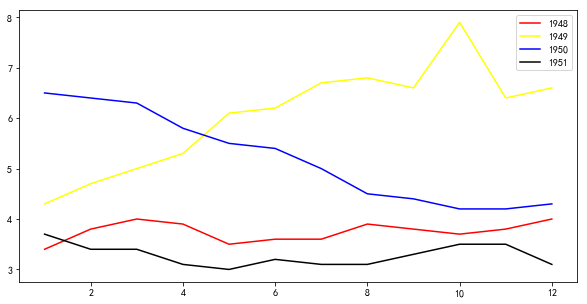

In [22]:
df["MONTH"]=df["DATE"].dt.month
fig=plt.figure(figsize=(10,5))
colors=["red","yellow","blue","black"]
for i in range(4):
    start_index=i*12
    end_index=(i+1)*12
    subset=df[start_index:end_index]
    label=str(1948+i)
    plt.plot(subset["MONTH"],subset["VALUE"],c=colors[i],label=label)
plt.legend(loc="best")
plt.show()

# 条形图与散点图 

In [23]:
filepath="C:\\Users\\ma\\Desktop\\唐宇迪-机器学习课程\\Python库代码（4个）\\3-可视化库matpltlib\\\数据和代码\\fandango_scores.csv"
pwd=os.getcwd()
os.chdir(os.path.dirname(filepath))
df = pd.read_csv(os.path.basename(filepath))
os.chdir(pwd)
print(df.head(3))

                             FILM  RottenTomatoes  RottenTomatoes_User  \
0  Avengers: Age of Ultron (2015)              74                   86   
1               Cinderella (2015)              85                   80   
2                  Ant-Man (2015)              80                   90   

   Metacritic  Metacritic_User  IMDB  Fandango_Stars  Fandango_Ratingvalue  \
0          66              7.1   7.8             5.0                   4.5   
1          67              7.5   7.1             5.0                   4.5   
2          64              8.1   7.8             5.0                   4.5   

   RT_norm  RT_user_norm         ...           IMDB_norm  RT_norm_round  \
0     3.70           4.3         ...                3.90            3.5   
1     4.25           4.0         ...                3.55            4.5   
2     4.00           4.5         ...                3.90            4.0   

   RT_user_norm_round  Metacritic_norm_round  Metacritic_user_norm_round  \
0            

In [45]:
cols=["RT_user_norm","Metacritic_user_nom","IMDB_norm","Fandango_Ratingvalue"]
data=df[cols]
print(data[:3])

   RT_user_norm  Metacritic_user_nom  IMDB_norm  Fandango_Ratingvalue
0           4.3                 3.55       3.90                   4.5
1           4.0                 3.75       3.55                   4.5
2           4.5                 4.05       3.90                   4.5


[ 4.3   3.55  3.9   4.5 ]
[ 0.75  1.75  2.75  3.75]


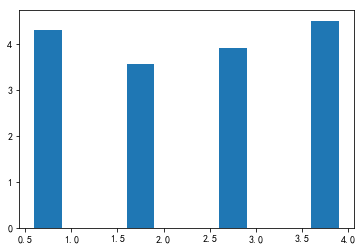

In [47]:
from numpy import arange
bar_height=data.loc[0,cols].values
print(bar_height)
bar_position=arange(4)+0.75
print(bar_position)
fig,ax=plt.subplots()
ax.bar(bar_position,bar_height,0.3)
plt.show()

### 条形图用bar，散点图用scatter 

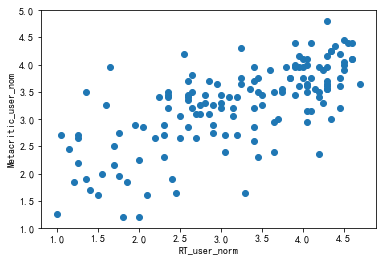

In [50]:
fig,ax=plt.subplots()
ax.scatter(data["RT_user_norm"],data["Metacritic_user_nom"])
ax.set_xlabel("RT_user_norm")
ax.set_ylabel("Metacritic_user_nom")
plt.show()

# 柱形图hist与盒图 boxplot

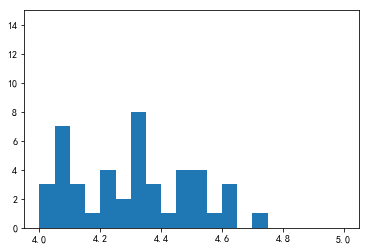

In [57]:
fig,ax=plt.subplots()
ax.hist(data["RT_user_norm"],range=(4,5),bins=20)
ax.set_ylim(0,15)
plt.show()

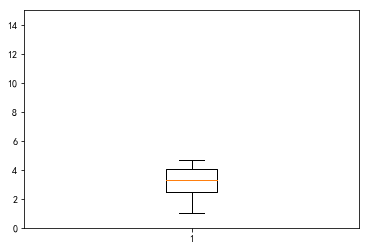

In [58]:
fig,ax=plt.subplots()
ax.boxplot(data["RT_user_norm"])
ax.set_ylim(0,15)
plt.show()

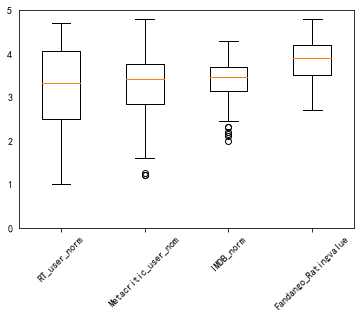

In [67]:
num_cols=["RT_user_norm","Metacritic_user_nom","IMDB_norm","Fandango_Ratingvalue"]
fig,ax=plt.subplots()
ax.boxplot(data[num_cols].values)
ax.set_xticklabels(num_cols,rotation=45)
#设置y轴值范围
ax.set_ylim(0,5)
#设置轴上的尺是否显示，还有bottom、top、left、right属性
ax.tick_params(left="off")
plt.show()

# 细节设置

#设置轴上的尺是否显示，还有bottom、top、left、right属性
ax.tick_params(left="off")
#设置图大小，用figsize=(10,5)
#设置线的粗细，用linewidth=10